# IF3170 Artificial Intelligence | Tugas Besar 2

Group Number: 40 - Learning Tin Can

Group Members:
- Justin Aditya Putra Prabakti (13522130)
- Attara Majesta Ayub (13522139)
- Jason Fernando (13522156)
- Atqiya Haydar Luqman (13522163)

## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import datetime
import re
from functools import partial
from typing import List

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm.notebook import tqdm
from scipy.stats import skew, kurtosis, mode
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import skew, kurtosis
import statsmodels.api as sm

from sklearn.model_selection import (
    KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold,
    RepeatedKFold, cross_val_score as cvs, cross_val_predict as cvp
)
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve,
    RocCurveDisplay, cohen_kappa_score, confusion_matrix, log_loss, f1_score,
    median_absolute_error, mean_squared_error, recall_score, classification_report
)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer,
    PowerTransformer, PolynomialFeatures, RobustScaler
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

sns.set()
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

## Import Dataset

In [ ]:
additional_train = pd.read_csv('https://drive.google.com/uc?id=1DEkpApxAm1OfN2H0XceJtylTIj0NmmzZ')
basic_train = pd.read_csv('https://drive.google.com/uc?id=10u-yWhXaYHjRfF16Hgmay8__ZCAhuCy2')
content_train = pd.read_csv('https://drive.google.com/uc?id=1oq02jSwLbk7bTjJineWKnjrelVsTDo3U')
flow_train = pd.read_csv('https://drive.google.com/uc?id=1Iou8wB2ZA-i_qTa3HzIl-95_tCSM6P9I')
time_train = pd.read_csv('https://drive.google.com/uc?id=14PR-LubN3vhmGZThMB2TUPYjzDIEVSn6')
label_train = pd.read_csv('https://drive.google.com/uc?id=1dMTiXNHgPczPl7F1bQFp6N6ZtNFkN3x4')
unsw_nb15_train = pd.read_csv('https://drive.google.com/uc?id=1bFyDZEhCVWg7E9WXmTc8m5klIMQm7ipR')

In [ ]:
additional_test = pd.read_csv('https://drive.google.com/uc?id=12VgpwjovayjYPsb4nMoTYxkzfy4v577F')
basic_test = pd.read_csv('https://drive.google.com/uc?id=149n4vi_BiC1OmxBfU__o9Ms-ZZ3MIl8a')
content_test = pd.read_csv('https://drive.google.com/uc?id=13uXFYfLd5vPMz-fJG0gJdsLFDyklAy_5')
flow_test = pd.read_csv('https://drive.google.com/uc?id=1NZO4bGUtoEcttvbXCQK_HU-eNtUIjs9x')
time_test = pd.read_csv('https://drive.google.com/uc?id=1QSLXk-fH1tXazVeY78vTqlYUcj4An1q5')

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [ ]:
additional_train.head(20)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,id
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,1.0,5.0,0
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,1
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,2
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,3
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,NaN,1.0,4
5,0.0,2.0,0.0,NaN,0.0,34.0,34.0,25.0,25.0,25.0,12.0,34.0,5
6,0.0,2.0,0.0,0.0,0.0,9.0,9.0,NaN,9.0,9.0,9.0,9.0,6
7,0.0,1.0,0.0,0.0,0.0,6.0,4.0,1.0,2.0,NaN,1.0,4.0,7
8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,NaN,1.0,NaN,1.0,8
9,0.0,0.0,NaN,0.0,0.0,6.0,5.0,2.0,2.0,1.0,1.0,3.0,9


In [ ]:
basic_train.head(20)

,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,id
0,FIN,2.736664,13350.0,548216.0,31.0,29.0,21.0,197.0,-,3.885899e+04,1.598925e+06,232.0,438.0,0
1,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,0.000000e+00,2.0,0.0,1
2,FIN,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,-,8.199669e+03,5.221364e+03,36.0,34.0,2
3,FIN,3.849634,25160.0,NaN,31.0,29.0,38.0,390.0,-,5.216912e+04,2.272451e+06,448.0,858.0,3
4,CON,0.001052,130.0,162.0,NaN,29.0,0.0,0.0,dns,4.942966e+05,6.159696e+05,2.0,2.0,4
5,INT,0.000005,114.0,0.0,254.0,0.0,0.0,0.0,dns,9.120000e+07,0.000000e+00,2.0,0.0,5
6,INT,0.000008,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.700000e+07,0.000000e+00,2.0,0.0,6
7,FIN,1.465899,28660.0,NaN,254.0,252.0,14.0,3.0,-,1.518140e+05,4.169455e+03,34.0,16.0,7
8,FIN,0.034137,NaN,3380.0,31.0,29.0,18.0,8.0,smtp,8.617278e+06,7.733544e+05,52.0,42.0,8
9,FIN,0.022733,2958.0,33044.0,31.0,29.0,7.0,18.0,-,1.019487e+06,1.139630e+07,48.0,50.0,9


In [ ]:
content_train.head(20)

,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,id
0,255.0,255.0,4.864839e+08,4.926043e+08,58.0,NaN,0.0,0.0,0
1,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,1
2,255.0,255.0,3.835852e+09,2.010029e+08,170.0,114.0,0.0,0.0,2
3,255.0,255.0,NaN,6.614436e+08,56.0,1276.0,0.0,0.0,3
4,0.0,0.0,0.000000e+00,0.000000e+00,65.0,81.0,0.0,0.0,4
5,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,5
6,0.0,0.0,0.000000e+00,NaN,57.0,0.0,0.0,0.0,6
7,255.0,255.0,3.680557e+09,5.902739e+08,843.0,51.0,0.0,0.0,7
8,255.0,255.0,4.019494e+09,1.875135e+09,721.0,80.0,0.0,0.0,8
9,255.0,255.0,2.991578e+09,3.016561e+09,62.0,NaN,0.0,0.0,9


In [ ]:
flow_train.head(20)

,proto,id
0,tcp,0
1,udp,1
2,tcp,2
3,tcp,3
4,udp,4
5,udp,5
6,udp,6
7,tcp,7
8,tcp,8
9,tcp,9


In [ ]:
time_train.head(20)

,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,id
0,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,0
1,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,1
2,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,2
3,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,3
4,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,4
5,NaN,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,5
6,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,6
7,NaN,125.553867,43.671909,NaN,0.140336,0.090759,0.049577,7
8,42.179459,NaN,0.689755,0.819268,0.000667,0.000542,NaN,8
9,25.926994,26.607684,0.477085,0.452469,0.000682,0.000559,0.000123,9


In [ ]:
label_train.head(20)

,attack_cat,label,id
0,Normal,0,0
1,Generic,1,1
2,Exploits,1,2
3,Normal,0,3
4,Normal,0,4
5,Generic,1,5
6,Generic,1,6
7,Fuzzers,1,7
8,Normal,0,8
9,Normal,0,9


In [ ]:
unsw_nb15_train.head(20)

,No.,Name,Type,Description,feature_type
0,5,proto,nominal,Transaction protocol,flow
1,6,state,nominal,Indicates to the state and its dependent proto...,basic
2,7,dur,Float,Record total duration,basic
3,8,sbytes,Integer,Source to destination transaction bytes,basic
4,9,dbytes,Integer,Destination to source transaction bytes,basic
5,10,sttl,Integer,Source to destination time to live value,basic
6,11,dttl,Integer,Destination to source time to live value,basic
7,12,sloss,Integer,Source packets retransmitted or dropped,basic
8,13,dloss,Integer,Destination packets retransmitted or dropped,basic
9,14,service,nominal,"http, ftp, smtp, ssh, dns, ftp-data ,irc and ...",basic


In [ ]:
df_train = pd.merge(additional_train, basic_train, on='id')
df_train = pd.merge(df_train, content_train, on='id')
df_train = pd.merge(df_train, flow_train, on='id')
df_train = pd.merge(df_train, time_train, on='id')
df_train = pd.merge(df_train, label_train, on='id')
df_train.head(20)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,id,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat,label
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,1.0,5.0,0,FIN,2.736664,13350.0,548216.0,31.0,29.0,21.0,197.0,-,3.885899e+04,1.598925e+06,232.0,438.0,255.0,255.0,4.864839e+08,4.926043e+08,58.0,NaN,0.0,0.0,tcp,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,Normal,0
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,1,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,udp,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,Generic,1
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,2,FIN,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,-,8.199669e+03,5.221364e+03,36.0,34.0,255.0,255.0,3.835852e+09,2.010029e+08,170.0,114.0,0.0,0.0,tcp,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,Exploits,1
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,3,FIN,3.849634,25160.0,NaN,31.0,29.0,38.0,390.0,-,5.216912e+04,2.272451e+06,448.0,858.0,255.0,255.0,NaN,6.614436e+08,56.0,1276.0,0.0,0.0,tcp,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,Normal,0
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,NaN,1.0,4,CON,0.001052,130.0,162.0,NaN,29.0,0.0,0.0,dns,4.942966e+05,6.159696e+05,2.0,2.0,0.0,0.0,0.000000e+00,0.000000e+00,65.0,81.0,0.0,0.0,udp,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,Normal,0
5,0.0,2.0,0.0,NaN,0.0,34.0,34.0,25.0,25.0,25.0,12.0,34.0,5,INT,0.000005,114.0,0.0,254.0,0.0,0.0,0.0,dns,9.120000e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,udp,NaN,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,Generic,1
6,0.0,2.0,0.0,0.0,0.0,9.0,9.0,NaN,9.0,9.0,9.0,9.0,6,INT,0.000008,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.700000e+07,0.000000e+00,2.0,0.0,0.0,0.0,0.000000e+00,NaN,57.0,0.0,0.0,0.0,udp,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,Generic,1
7,0.0,1.0,0.0,0.0,0.0,6.0,4.0,1.0,2.0,NaN,1.0,4.0,7,FIN,1.465899,28660.0,NaN,254.0,252.0,14.0,3.0,-,1.518140e+05,4.169455e+03,34.0,16.0,255.0,255.0,3.680557e+09,5.902739e+08,843.0,51.0,0.0,0.0,tcp,NaN,125.553867,43.671909,NaN,0.140336,0.090759,0.049577,Fuzzers,1
8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,NaN,1.0,NaN,1.0,8,FIN,0.034137,NaN,3380.0,31.0,29.0,18.0,8.0,smtp,8.617278e+06,7.733544e+05,52.0,42.0,255.0,255.0,4.019494e+09,1.875135e+09,721.0,80.0,0.0,0.0,tcp,42.179459,NaN,0.689755,0.819268,0.000667,0.000542,NaN,Normal,0
9,0.0,0.0,NaN,0.0,0.0,6.0,5.0,2.0,2.0,1.0,1.0,3.0,9,FIN,0.022733,2958.0,33044.0,31.0,29.0,7.0,18.0,-,1.019487e+06,1.139630e+07,48.0,50.0,255.0,255.0,2.991578e+09,3.016561e+09,62.0,NaN,0.0,0.0,tcp,25.926994,26.607684,0.477085,0.452469,0.000682,0.000559,0.000123,Normal,0


In [ ]:
df_test = pd.merge(additional_test, basic_test, on='id')
df_test = pd.merge(df_test, content_test, on='id')
df_test = pd.merge(df_test, flow_test, on='id')
df_test = pd.merge(df_test, time_test, on='id')
df_test.head(20)

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,id,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,1.0,2.0,0,FIN,0.454980,534.0,268.0,254.0,252.0,2.0,1.0,-,8.457515e+03,3938.634766,10.0,6.0,255.0,255.0,2.914597e+08,3.441056e+09,53.0,45.0,0.0,0.0,tcp,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116
1,0.0,1.0,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,1.0,5.0,1,FIN,0.648037,8854.0,268.0,254.0,252.0,4.0,1.0,-,1.015004e+05,2765.274170,14.0,6.0,255.0,255.0,2.288130e+09,3.754733e+07,632.0,45.0,0.0,0.0,tcp,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356
2,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,1.0,4.0,2,FIN,1.120856,3440.0,642.0,254.0,252.0,5.0,3.0,-,2.301812e+04,4203.929688,16.0,12.0,255.0,255.0,2.901133e+09,1.323903e+09,215.0,54.0,0.0,0.0,tcp,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691
3,0.0,2.0,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,1.0,4.0,3,INT,0.000001,244.0,0.0,254.0,NaN,0.0,0.0,NaN,NaN,0.000000,2.0,0.0,0.0,0.0,0.000000e+00,NaN,NaN,0.0,0.0,0.0,udp,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
4,NaN,0.0,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,1.0,7.0,4,FIN,0.264763,1540.0,1644.0,31.0,29.0,4.0,4.0,-,4.363147e+04,46924.984380,16.0,18.0,255.0,255.0,2.457682e+09,3.533657e+08,96.0,91.0,0.0,0.0,tcp,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129
5,NaN,2.0,0.0,0.0,NaN,36.0,36.0,19.0,18.0,18.0,NaN,36.0,5,INT,0.000008,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.700000e+07,0.000000,2.0,0.0,NaN,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,udp,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
6,0.0,2.0,0.0,0.0,0.0,47.0,47.0,43.0,43.0,43.0,18.0,NaN,6,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,0.000000,2.0,0.0,NaN,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,udp,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000
7,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,7,FIN,NaN,878.0,354.0,254.0,252.0,2.0,1.0,-,5.594173e+03,2192.406738,10.0,8.0,255.0,255.0,2.269355e+09,4.133200e+09,88.0,44.0,0.0,0.0,tcp,6986.240129,278.607531,125.590000,149.155859,0.159076,0.087084,0.071992
8,0.0,1.0,0.0,0.0,0.0,6.0,5.0,3.0,4.0,3.0,2.0,NaN,8,FIN,0.504283,534.0,268.0,254.0,252.0,1.0,0.0,-,7.630636e+03,NaN,10.0,6.0,255.0,255.0,1.807415e+09,2.670888e+09,53.0,45.0,0.0,0.0,tcp,NaN,NaN,6970.112500,11621.684000,0.139367,0.080098,0.059269
9,0.0,2.0,0.0,0.0,0.0,4.0,NaN,1.0,2.0,1.0,NaN,2.0,9,INT,0.000009,78.0,0.0,254.0,0.0,0.0,0.0,-,3.466666e+07,0.000000,2.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,39.0,0.0,0.0,0.0,udp,NaN,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_sm_ips_ports    166595 non-null  float64
 1   ct_state_ttl       166706 non-null  float64
 2   ct_flw_http_mthd   166694 non-null  float64
 3   is_ftp_login       166694 non-null  float64
 4   ct_ftp_cmd         166499 non-null  float64
 5   ct_srv_src         166490 non-null  float64
 6   ct_srv_dst         166567 non-null  float64
 7   ct_dst_ltm         166603 non-null  float64
 8   ct_src_ltm         166518 non-null  float64
 9   ct_src_dport_ltm   166566 non-null  float64
 10  ct_dst_sport_ltm   166553 non-null  float64
 11  ct_dst_src_ltm     166446 non-null  float64
 12  id                 175341 non-null  int64  
 13  state              166536 non-null  object 
 14  dur                166619 non-null  float64
 15  sbytes             166780 non-null  float64
 16  db

In [ ]:
df_train.columns

Index(['is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'id', 'state',
       'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service',
       'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'proto', 'sjit',
       'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'attack_cat',
       'label'],
      dtype='object')

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

,0
dloss,8978
ct_dst_src_ltm,8895
dbytes,8869
dmean,8855
ct_srv_src,8851
djit,8846
ct_ftp_cmd,8842
dload,8837
tcprtt,8836
proto,8826


In [ ]:
for col in df_train.columns:
    print(f'{col}: {df_train[col].nunique()}')

is_sm_ips_ports: 2
ct_state_ttl: 5
ct_flw_http_mthd: 11
is_ftp_login: 4
ct_ftp_cmd: 4
ct_srv_src: 52
ct_srv_dst: 52
ct_dst_ltm: 50
ct_src_ltm: 50
ct_src_dport_ltm: 47
ct_dst_sport_ltm: 32
ct_dst_src_ltm: 54
id: 175341
state: 9
dur: 70713
sbytes: 6997
dbytes: 6432
sttl: 11
dttl: 6
sloss: 394
dloss: 365
service: 13
sload: 77315
dload: 73756
spkts: 470
dpkts: 432
swin: 11
dwin: 7
stcpb: 71744
dtcpb: 71536
smean: 1356
dmean: 1322
trans_depth: 11
response_body_len: 2327
proto: 133
sjit: 73895
djit: 73045
sinpkt: 72757
dinpkt: 70746
tcprtt: 41517
synack: 38626
ackdat: 36365
attack_cat: 10
label: 2


In [ ]:
for col in df_train.columns:
    print(f'{col}: {df_train[col].unique()}')

is_sm_ips_ports: [ 0. nan  1.]
ct_state_ttl: [ 0.  2. nan  1.  3.  6.]
ct_flw_http_mthd: [ 0. nan  1.  4.  2.  6. 16. 30.  9. 25. 12.  3.]
is_ftp_login: [ 0. nan  1.  2.  4.]
ct_ftp_cmd: [ 0. nan  1.  2.  4.]
ct_srv_src: [11. 10.  4.  9.  3. 34.  6.  1. 17. nan 13. 31. 42.  5.  7.  2. 27. 12.
 33. 14. 26.  8. 24. 29. 38. 36. 63. 19. 20. 46. 18. 44. 28. 30. 22. 40.
 21. 23. 25. 32. 15. 51. 16. 39. 35. 43. 50. 49. 37. 41. 45. 52. 47.]
ct_srv_dst: [nan 10.  4.  9.  3. 34.  1.  5. 17. 13.  2. 31. 42. 16.  7. 27. 26.  6.
 33. 14.  8. 12. 24. 29. 18. 36. 62. 19. 44. 20. 46. 28. 30. 22. 40. 23.
 25. 39. 32. 51. 21. 35. 11. 43. 15. 50. 49. 38. 37. 41. 45. 47. 52.]
ct_dst_ltm: [ 5. 10.  2.  3.  4. 25. nan  1. 17.  7. 24. 31. 30. 16.  8. 14. 18. 29.
 13. 36. 33. 12. 28. 11. 19. 32.  9. 23. 34. 15.  6. 35. 51. 21. 22. 20.
 45. 27. 37. 26. 50. 38. 46. 42. 48. 39. 41. 43. 40. 44. 47.]
ct_src_ltm: [ 4. 10.  2.  3. 25.  9. nan  1. 18. 17.  5. 24. 31. 30.  7. 16. 22. 20.
  8.  6. 35. 29. 12. 36. 34. 2

In [ ]:
for col in df_train.columns:
    print(f'{col}: {df_train[col].value_counts()}')

is_sm_ips_ports: is_sm_ips_ports
0.0    163963
1.0      2632
Name: count, dtype: int64
ct_state_ttl: ct_state_ttl
2.0    77981
1.0    46914
0.0    38821
6.0     1838
3.0     1152
Name: count, dtype: int64
ct_flw_http_mthd: ct_flw_http_mthd
0.0     149698
1.0      15920
4.0        793
9.0         85
2.0         71
6.0         36
30.0        26
25.0        24
12.0        22
16.0        16
3.0          3
Name: count, dtype: int64
is_ftp_login: is_ftp_login
0.0    164251
1.0      2422
4.0        16
2.0         5
Name: count, dtype: int64
ct_ftp_cmd: ct_ftp_cmd
0.0    164056
1.0      2423
4.0        14
2.0         6
Name: count, dtype: int64
ct_srv_src: ct_srv_src
1.0     34382
2.0     19637
3.0     15887
4.0     12613
5.0     10245
6.0      9585
7.0      6463
8.0      4948
9.0      3984
33.0     3867
10.0     3362
16.0     2652
12.0     2473
17.0     2328
11.0     2323
34.0     2210
26.0     1809
28.0     1619
32.0     1563
14.0     1555
24.0     1510
13.0     1487
29.0     1479
27.0     1

In [ ]:
LABEL = 'attack_cat'

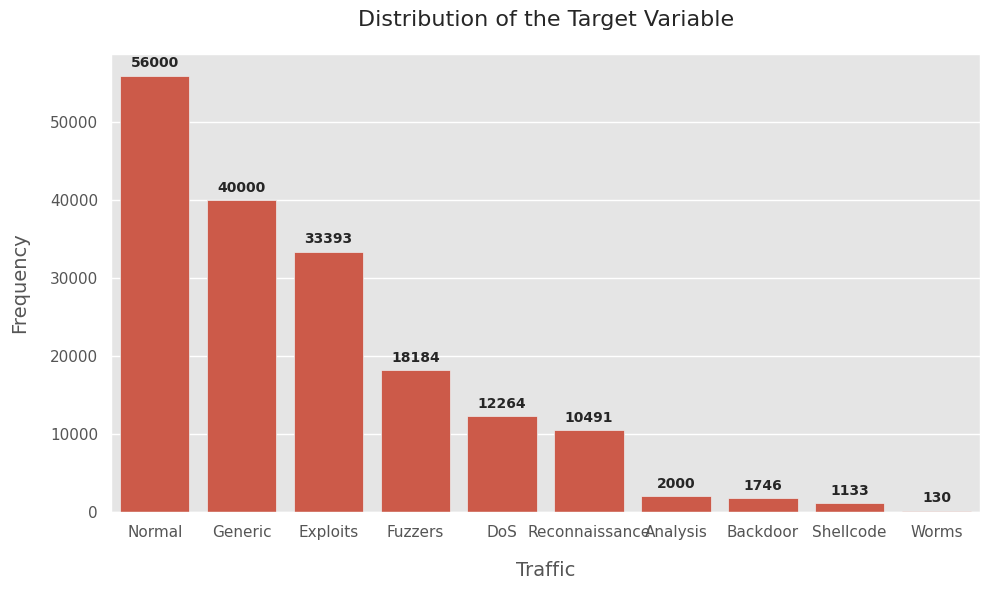

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size and palette
plt.figure(figsize=(10, 6))

# Use a custom palette for the countplot

# Create the countplot
count_plot = sns.countplot(data=df_train, x=LABEL)

# Add title and labels
plt.title('Distribution of the Target Variable', fontsize=16, pad=20)
plt.xlabel('Traffic', fontsize=14, labelpad=15)
plt.ylabel('Frequency', fontsize=14, labelpad=15)

# Add the count numbers on top of each bar
for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 9),
                        textcoords = 'offset points',
                        fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
normal_data = df_train[df_train[LABEL] == 'Normal']
generic_data = df_train[df_train[LABEL] == 'Generic']
exploits_data = df_train[df_train[LABEL] == 'Exploits']
fuzzers_data = df_train[df_train[LABEL] == 'Fuzzers']
dos_data = df_train[df_train[LABEL] == 'DoS']
reconnaissance_data = df_train[df_train[LABEL] == 'Reconnaissance']
analysis_data = df_train[df_train[LABEL] == 'Analysis']
backdoor_data = df_train[df_train[LABEL] == 'Backdoor']
shellcode_data = df_train[df_train[LABEL] == 'Shellcode']
worms_data = df_train[df_train[LABEL] == 'Worms']

In [ ]:
print(df_train.select_dtypes(include='object').columns)

Index(['state', 'service', 'proto', 'attack_cat'], dtype='object')


In [ ]:
for col in df_train.select_dtypes(include='object').columns:
    print(f'{col}:')
    for label in df_train[LABEL].unique():
        print(f'  {label}:')
        print(df_train[df_train[LABEL] == label][col].value_counts())
    print()

state:
  Normal:
state
FIN    35293
CON    11478
INT     5411
REQ      883
RST       66
ECO       12
URN        1
PAR        1
no         1
Name: count, dtype: int64
  Generic:
state
INT    37487
FIN      468
CON       16
REQ       12
RST        1
Name: count, dtype: int64
  Exploits:
state
FIN    18604
INT    12169
CON      566
REQ      331
RST        7
Name: count, dtype: int64
  Fuzzers:
state
FIN    11199
INT     5778
REQ      329
CON       30
Name: count, dtype: int64
  DoS:
state
INT    9040
FIN    2108
CON     282
REQ     220
RST       2
Name: count, dtype: int64
  Reconnaissance:
state
INT    5047
FIN    4824
REQ      55
CON      45
RST       2
Name: count, dtype: int64
  Analysis:
state
INT    1333
FIN     533
REQ      20
CON       8
Name: count, dtype: int64
  Backdoor:
state
INT    1325
FIN     259
CON      54
REQ      39
Name: count, dtype: int64
  Shellcode:
state
INT    544
FIN    532
Name: count, dtype: int64
  Worms:
state
FIN    105
INT     14
CON      2
Name: count, d

In [ ]:
unsw_nb15_train[unsw_nb15_train["Name"] == "proto"].iloc[0]["Type "]

'nominal'

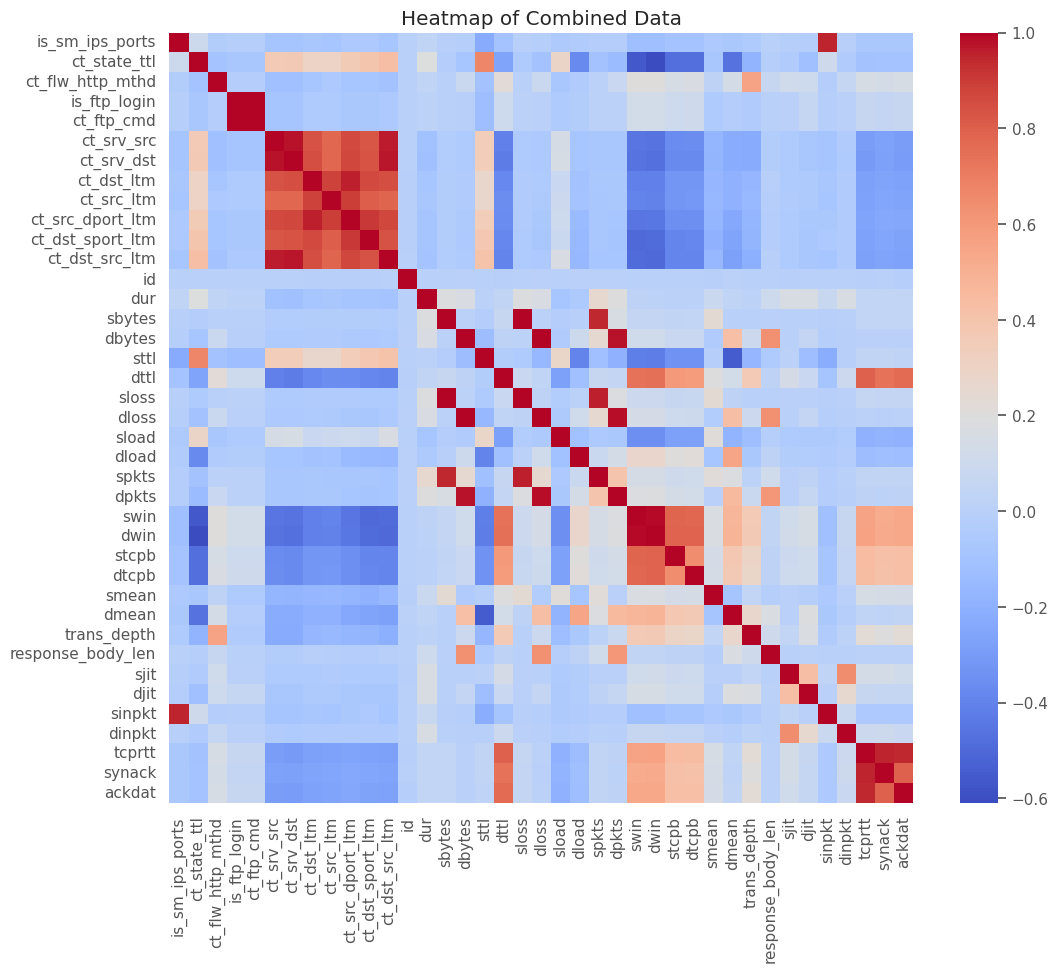

In [ ]:
# Assuming `target` contains DataFrames additional, basic, content, flow, time
target = [additional_train, basic_train, content_train, flow_train, time_train]

# Strip columns that are nominal or binary
cleaned_frames = []
for frame in target:
    frame = frame.copy()  # Avoid modifying the original DataFrame
    for col in frame.columns.to_list():
        if col == "id":
            continue
        # Ensure no space issue in "Type " column
        col_type = unsw_nb15_train.loc[unsw_nb15_train["Name"] == col, "Type "].values[0].strip()
        if col_type in ["nominal", "binary"]:
            frame = frame.drop(col, axis=1)
    cleaned_frames.append(frame)

# Combine all cleaned DataFrames on "id"
combined_df = cleaned_frames[0]
for frame in cleaned_frames[1:]:
    combined_df = combined_df.merge(frame, on="id", how="inner")  # Join on "id"

# Drop rows with NaN
combined_df = combined_df.dropna()

# Create a heatmap from the combined DataFrame
plt.figure(figsize=(12, 10))
sns.heatmap(combined_df.corr(), annot=False, cmap="coolwarm")
plt.title("Heatmap of Combined Data")
plt.show()

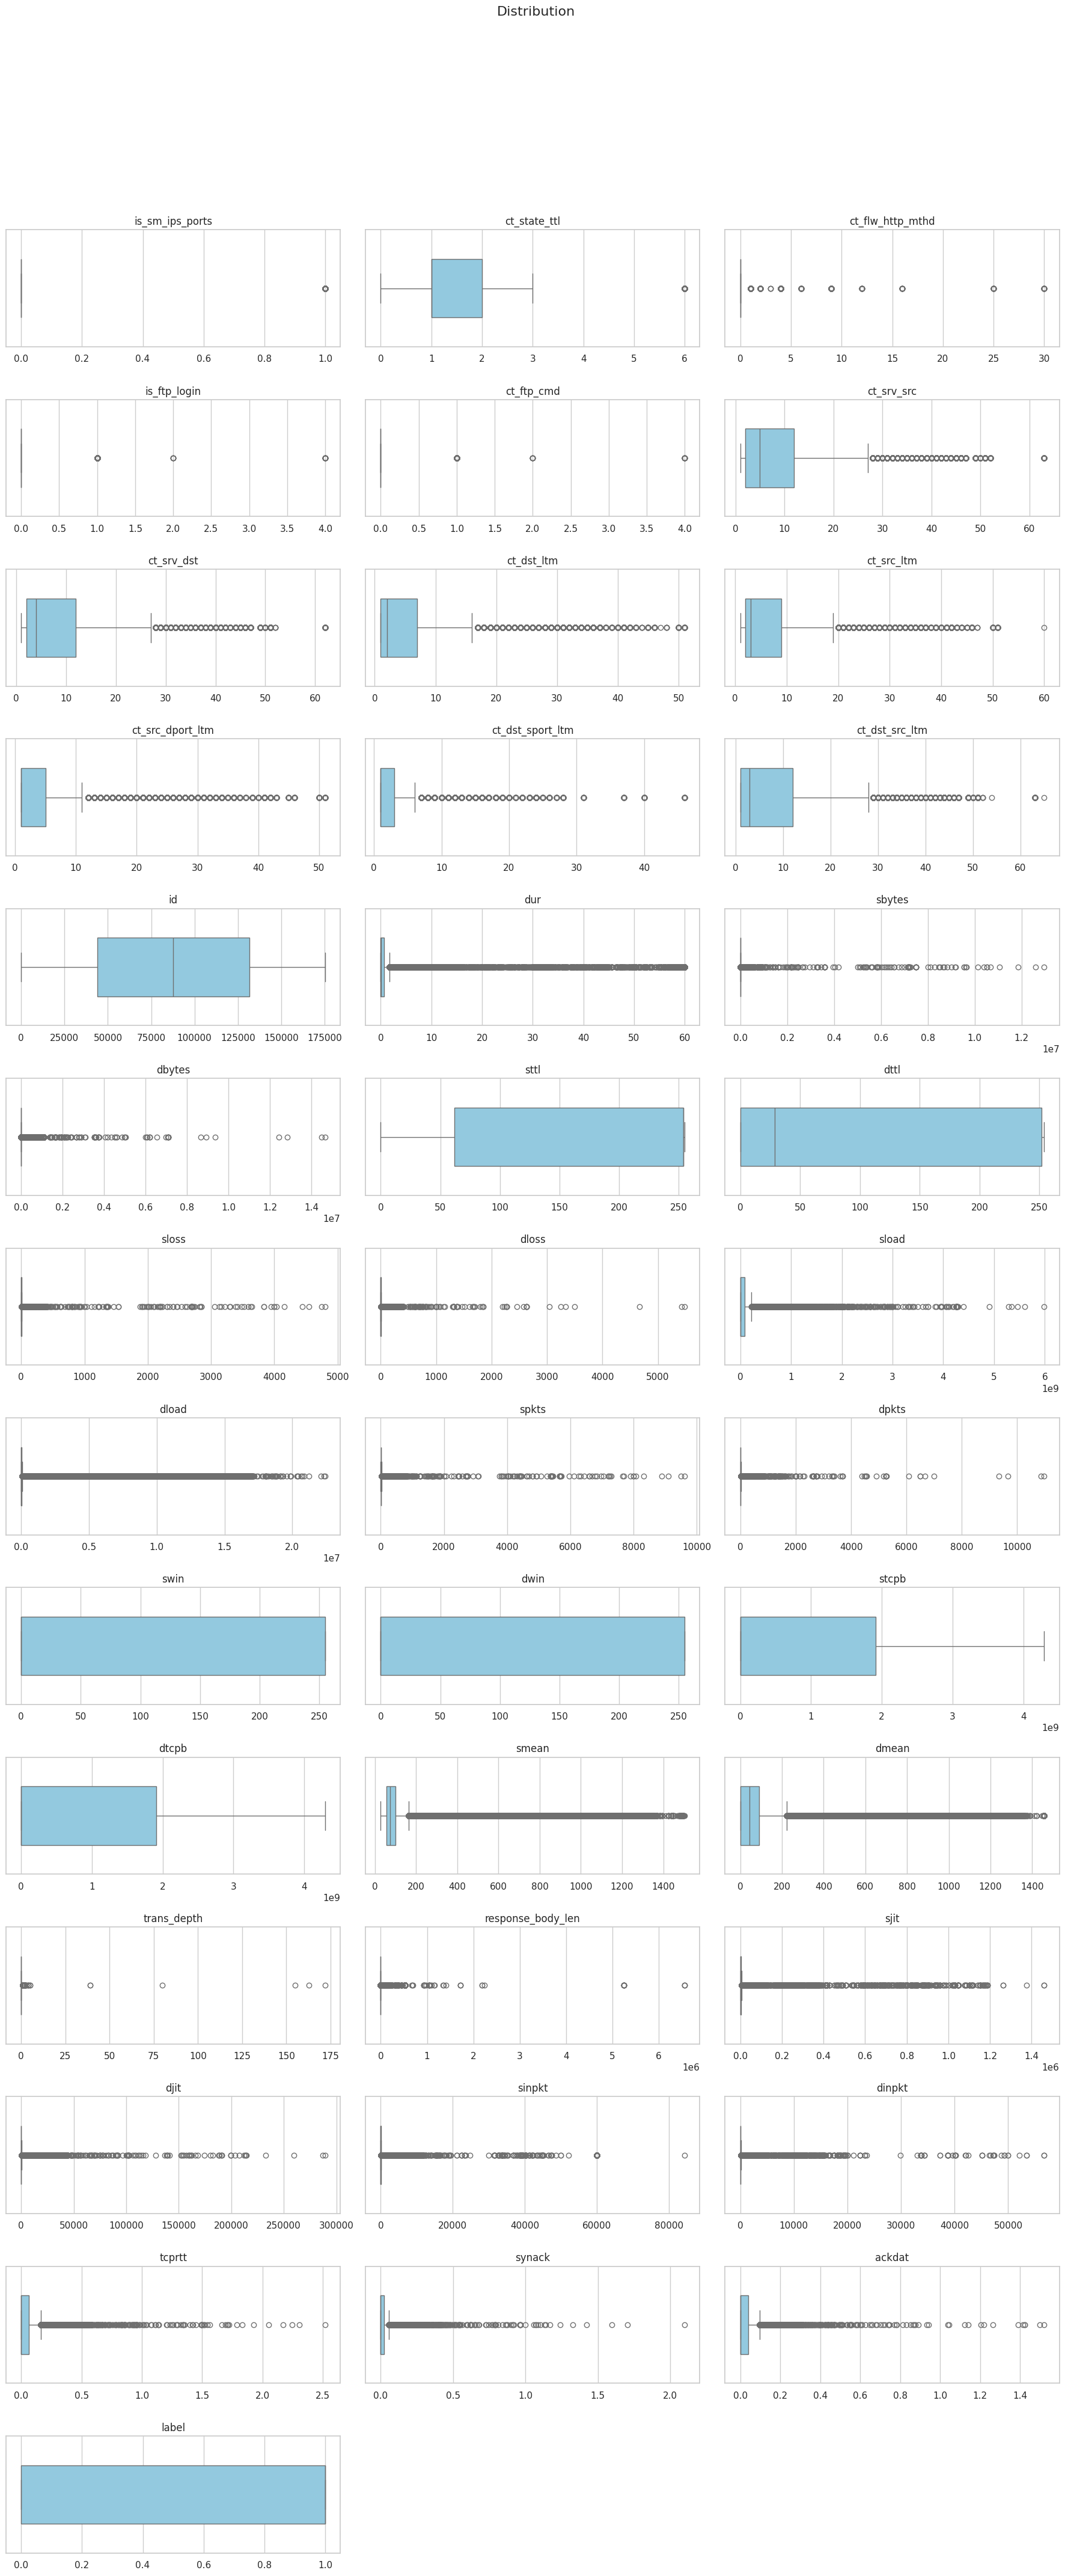

In [ ]:
import math

numerical_columns = df_train.select_dtypes(include='number').columns

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df_train[col], color='skyblue', width=0.5)
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# datasets = {
#     "additional": "./test/additional_features_test.csv",
#     "basic": "./test/basic_features_test.csv",
#     "content": "./test/content_features_test.csv",
#     "flow": "./test/flow_features_test.csv",
#     "time": "./test/time_features_test.csv",
#     "unsw_nb15": "./test/UNSW-NB15_features-modified.csv"
# }

# # Fungsi Untuk Memahami Dataset
# def perform_dataset_understanding(dataset_name, dataset_path):
#     print(f"Dataset: {dataset_name.capitalize()} Features")
#     data = pd.read_csv(datasets)

#     # 1. Tinjauan Data
#     dataset_shape = data.shape
#     column_types = data.dtypes
#     sample_rows = data.head()
#     print("Dataset Shape:", dataset_shape)
#     print("Column Types:\n", column_types)
#     print("Sample Rows:\n", sample_rows)

#     # 2. Statistik Deskriptif untuk data numerik
#     descriptive_stats = data.describe(include='all')
#     print("\nDescriptive Statistics:\n", descriptive_stats)

#     # 3. Pengecekan Nilai Unik untuk data kategorikal
#     unique_values = {col: data[col].nunique() for col in data.columns}
#     print("\nUnique Values per Column:\n", unique_values)

#     # 4. Identifikasi Nilai Hilang
#     missing_values = data.isnull().sum()
#     print("\nMissing Values:\n", missing_values)
#     print("-" * 80)

# # Menerapkan Dataset Understanding Terhadap Semua Data
# for name, path in datasets.items():
#     perform_dataset_understanding(name, path)


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [ ]:
from sklearn.impute import SimpleImputer

class FeatureImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        num_columns = X.select_dtypes(include='number').columns
        cat_columns = X.select_dtypes(include='object').columns

        # Impute missing values in numerical columns
        num_imputer = SimpleImputer(strategy='most_frequent')
        X[num_columns] = num_imputer.fit_transform(X[num_columns])

        # Impute missing values in categorical columns
        cat_imputer = SimpleImputer(strategy='most_frequent')
        X[cat_columns] = cat_imputer.fit_transform(X[cat_columns])

        return X

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Select numerical columns, excluding specified columns
        numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
        exclude_columns = ['sttl', 'dttl', 'dwin', 'stcpb', 'dtcpb']
        numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

        for feature in numerical_columns:
            max_value = X[feature].max()
            median_value = X[feature].median()
            if max_value > 10 * median_value and max_value > 10:
                upper_bound = X[feature].quantile(0.95)
                X[feature] = np.where(X[feature] < upper_bound, X[feature], upper_bound)

        return X

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
class DuplicateRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X.drop_duplicates(inplace=True)
        return X

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Select categorical columns
        categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

        for feature in categorical_columns:
            if X[feature].nunique() > 4:
                top_categories = X[feature].value_counts().head(3).index
                X[feature] = np.where(X[feature].isin(top_categories), X[feature], '-')

        return X

In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_cols: List[str]):
        self.drop_cols = drop_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X.drop(columns=self.drop_cols, inplace=True)
        return X

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Lakukan one-hot encoding hanya pada kolom tertentu
        X_encoded = pd.get_dummies(X, columns=self.columns, drop_first=False)

        return X_encoded

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Select numerical columns, excluding specified columns
        numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()

        for feature in numerical_columns:
            # Check the number of unique values
            if X[feature].nunique() > 50:
                # Apply logarithmic transformation
                if X[feature].min() == 0:
                    X[feature] = np.log(X[feature] + 1)
                else:
                    X[feature] = np.log(X[feature])

        return X

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Select numerical columns
        numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()

        # Scaler
        scaler = StandardScaler()

        for feature in numerical_columns:
            X[feature] = scaler.fit_transform(X[[feature]])

        return X

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Lakukan one-hot encoding hanya pada kolom tertentu
        X_encoded = pd.get_dummies(X, columns=self.columns, drop_first=False)

        return X_encoded

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [ ]:
# Reduces ammounts of data needed to be processed while still (attempting) to keep the ratios
class ValueReductor(BaseEstimator, TransformerMixin):
    def __init__(self, reduction_percent: float = 100, prioritize_na: bool = False, na_hit_rate: float = 1.0):
        """
        reduction_percent: Percentage of data to retain (0 < reduction_percent <= 100).
        prioritize_na: Whether to prioritize removing rows with NaN values.
        na_hit_rate: Fraction of NaN rows to remove (0 <= na_hit_rate <= 1).
        """
        if reduction_percent <= 0 or reduction_percent > 100:
            raise ValueError("Reduction percentage must be between 0 and 100.")
        if not (0 <= na_hit_rate <= 1):
            raise ValueError("na_hit_rate must be between 0 and 1.")

        self.reduction_percent = reduction_percent / 100  # Convert to fraction
        self.prioritize_na = prioritize_na
        self.na_hit_rate = na_hit_rate

    def fit(self, X, y=None):
        # Gak perlu sih sebenernya
        return self

    def transform(self, X, y=None):
        """
        param X : Data (features) as a pandas DataFrame.
        param y : Labels as a pandas Series.
        return : Tuple of reduced X and y (pandas DataFrame and Series).
        """
        if y is None:
            raise ValueError("The ValueReductor requires `y` to reduce the data while maintaining distribution.")

        # Combine X and y for easier processing
        data = pd.concat([X, y], axis=1)
        label_col = y.name  # Name of the label column

        # Separate rows with NaN values if prioritization is enabled
        if self.prioritize_na:
            reduced_data = []

            for label, group in data.groupby(label_col):
                removal_count = int(len(group) * (1-self.reduction_percent))
                # From removal count, if na_hit_rate * removal_count < ammount of na samples : remove all nulls
                normal_samples = group[~group.isna().any(axis=1)]
                na_samples = group[group.isna().any(axis=1)]

                # How much null would remain after prioritized removal
                null_remaining = na_samples.shape[0] - int(removal_count * self.na_hit_rate)
                na_samples = na_samples.sample(n=max(null_remaining,0), random_state=42)

                # When null_remaining is negative, it implies that some normal values need to be removed
                normal_samples = pd.concat([normal_samples,na_samples])
                n_samples = normal_samples.shape[0] + null_remaining
                reduced_data.append(normal_samples.sample(n=n_samples, random_state=42))


            # Combine reduced NaN and non-NaN data
            reduced_data = pd.concat(reduced_data)
        else:
            # Standard reduction logic if prioritization is disabled
            reduced_data = []
            for label, group in data.groupby(label_col):
                n_samples = int(len(group) * self.reduction_percent)
                reduced_data.append(group.sample(n=n_samples, random_state=42))

            reduced_data = pd.concat(reduced_data)

        # Split back into X and y
        X_reduced = reduced_data.drop(columns=[label_col])
        y_reduced = reduced_data[label_col]

        return X_reduced, y_reduced


### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [ ]:
from sklearn.metrics import f1_score

def backward_feature_elimination_with_model(model):
    features = list(X_train.columns)
    history = []

    while len(features) > 1:
        model.fit(X_train[features], y_train)
        y_pred = model.predict(X_val[features])
        score = f1_score(y_val, y_pred, average='macro')

        history.append((features.copy(), score))
        print(f"Features: {features} | Score: {score:.4f}")

        worst_feature = None
        worst_score = score

        for feature in features:
            reduced_features = [f for f in features if f != feature]
            model.fit(X_train[reduced_features], y_train)
            y_pred_reduced = model.predict(X_val[reduced_features])
            reduced_score = f1_score(y_val, y_pred_reduced, average='macro')

            print(f"Removed feature: {feature} | Score: {reduced_score:.4f}")

            if reduced_score > worst_score:
                worst_score = reduced_score
                worst_feature = feature

        if worst_feature is not None:
            features.remove(worst_feature)
            print(f"Removed feature: {worst_feature} | Remaining Features: {features}")
        else:
            break

    best_features, best_score = max(history, key=lambda item: item[1])
    print(f"Best Features: {best_features} | Best Score: {best_score:.4f}")
    return best_features, best_score

# model = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
# best_features, best_score = backward_feature_elimination_with_model(model)

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
LABEL = "attack_cat"

In [ ]:
df_train = pd.merge(basic_train,content_train)
df_train = pd.merge(df_train, label_train)

In [ ]:
# Convert Index to list and remove LABEL
categorical_columns = df_train.select_dtypes(include='object').columns.tolist()
categorical_columns.remove(LABEL)

pipeline = Pipeline([
    ('feature_dropper', FeatureDropper(['id'])),
    ('feature_imputer', FeatureImputer()),
    ('outlier_remover', OutlierRemover()),
    ('feature_transformer', FeatureTransformer()),
    ('feature_engineering', FeatureEngineering()),
    ('feature_scaler', FeatureScaler()),
    ('feature_encoder', FeatureEncoder(categorical_columns)),
], verbose=True)

In [ ]:
df_train = DuplicateRemover().fit_transform(df_train)

X = df_train
X = pipeline.fit_transform(X)
X = X.drop(columns=[LABEL, 'label'])

y = df_train[LABEL]

[Pipeline] ... (step 1 of 7) Processing feature_dropper, total=   0.0s
[Pipeline] ... (step 2 of 7) Processing feature_imputer, total=   0.4s
[Pipeline] ... (step 3 of 7) Processing outlier_remover, total=   0.1s
[Pipeline]  (step 4 of 7) Processing feature_transformer, total=   0.1s
[Pipeline]  (step 5 of 7) Processing feature_engineering, total=   0.1s
[Pipeline] .... (step 6 of 7) Processing feature_scaler, total=   0.1s
[Pipeline] ... (step 7 of 7) Processing feature_encoder, total=   0.1s


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,state_-,state_CON,state_FIN,state_INT,service_-,service_dns,service_http
0,2.607522,2.245971,1.791763,-1.498056,-0.427632,2.904816,3.495818,-0.768117,1.575016,2.942116,3.172684,1.144539,1.155495,1.039314,1.040794,-0.619706,-0.945594,-0.327108,-0.254911,False,False,True,False,True,False,False
1,-0.645570,-0.953579,-0.932762,0.695846,-0.693434,-0.644345,-0.476506,0.800107,-0.927108,-0.587928,-0.574014,-0.873748,-0.865443,-0.865011,-0.864763,-0.646430,-0.945594,-0.327108,-0.254911,False,False,False,True,False,True,False
2,2.701584,1.735106,1.223416,0.695846,1.616294,2.904816,1.675170,-1.108246,0.572380,1.412431,1.480627,1.144539,1.155495,1.235904,0.955453,1.032665,0.950452,-0.327108,-0.254911,False,False,True,False,True,False,False
3,2.701584,2.245971,-0.932762,-1.498056,-0.427632,2.904816,3.495818,-0.703722,1.636590,2.942116,3.172684,1.144539,1.155495,-0.865011,1.068853,-0.673627,1.718482,-0.327108,-0.254911,False,False,True,False,True,False,False
4,-0.642998,-0.864859,0.395788,0.695846,-0.427632,-0.644345,-0.476506,-0.212111,1.407934,-0.587928,-0.453153,-0.873748,-0.865443,-0.865011,-0.864763,-0.444621,0.815305,-0.327108,-0.254911,False,True,False,False,False,True,False


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

In [ ]:
!pip install ipywidgets
from ipywidgets import IntProgress, Label, VBox, HBox
from IPython.display import display
import time

class Model:
    def fit(self, x : pd.DataFrame, y : pd.DataFrame) -> None:
        pass
    def guess(self, x : pd.DataFrame) -> list:
        pass
    def indices(self, x : pd.DataFrame) -> pd.DataFrame:
        pass

## A. KNN

In [ ]:
# NEWER
import numpy as np
import pandas as pd

# Define distance functions
def euclidean_distance(p, q):
    tosqrt = np.array(np.sum((p - q) ** 2,axis=1)).astype(float)
    return np.sqrt(tosqrt)

def manhattan_distance(p, q):
    return np.sum(np.abs(p - q),axis=1)

def minkowski_distance(p, q, p_value):
    tosqrt = np.sum(np.abs(p - q) ** p_value,axis=1)
    return tosqrt ** (1 / p_value)

# KNN Class
class KNN(Model):
    def __init__(self, neighbors=10, distance_method="manhattan", p_value=3):
        self.neighbors = neighbors
        self.data: pd.DataFrame = None
        self._indices: pd.DataFrame = None
        self.distance_method = distance_method
        self.p_value = p_value  # Used for Minkowski distance
        self._last_x = None
        self._last_results = None

    def fit(self, x: pd.DataFrame, y: pd.DataFrame) -> None:
        # Stores x and y in knn lmao
        self.data = x
        self._indices = y

    def _distance(self, p, q):
        # Selects distance function
        try:
            if self.distance_method == "euclidean":
                return euclidean_distance(p, q)
            elif self.distance_method == "manhattan":
                return manhattan_distance(p, q)
            elif self.distance_method == "minkowski":
                return minkowski_distance(p, q, self.p_value)
            else:
                raise ValueError(f"Unknown distance method: {self.distance_method}")
        except:
            print(type(p),"|",type(q))
            raise ValueError(f"Bruh i tell you what,{type(q)}")

    def _compute_neighbors(self, x: pd.DataFrame):
        # Find n nearest neighbors
        # Convert DataFrames to NumPy arrays for fast computation
        x_array = x.to_numpy()
        data_array = self.data.to_numpy()
        neighbors = []

        total_rows = x.shape[0]
        progress = IntProgress(min=0, max=total_rows)
        progress_label = Label(value="Processing rows...")
        display(HBox([progress_label, progress]))

        for row in x_array:
            # Calculate distances from the current point to all training data
            distances = self._distance(data_array, row)

            # Get indices of the nearest neighbors
            nearest_indices = np.argsort(distances)[:self.neighbors]
            neighbors.append(nearest_indices)

            progress.value += 1
            progress_label.value = f"{progress.value}/{progress.max} rows processed"

        return neighbors

    def guess(self, x: pd.DataFrame) -> list:
        # Returns the "Predictions" only
        assert x.columns.equals(self.data.columns), "Input features do not match training features."

        # Skip recalculation if the same data is used
        if self._last_x is not None and x.equals(self._last_x):
            neighbors = self._last_results
        else:
            neighbors = self._compute_neighbors(x)
            self._last_x = x.copy()
            self._last_results = neighbors

        results = []
        for neighbor_indices in neighbors:
            neighbor_labels = self._indices.iloc[neighbor_indices].values.flatten()
            predicted_class = pd.Series(neighbor_labels).mode().iloc[0]
            results.append(predicted_class)

        return results

    def indices(self, x: pd.DataFrame) -> pd.DataFrame:
        # Returns the "probabilty"/ratio of each class
        assert x.columns.equals(self.data.columns), "Input features do not match training features."

        # Skip recalculation if the same data is used
        if self._last_x is not None and x.equals(self._last_x):
            neighbors = self._last_results
        else:
            neighbors = self._compute_neighbors(x)
            self._last_x = x.copy()
            self._last_results = neighbors

        results = []
        for neighbor_indices in neighbors:
            neighbor_labels = self._indices.iloc[neighbor_indices].values.flatten()
            label_counts = pd.Series(neighbor_labels).value_counts(normalize=True).to_dict()
            results.append(label_counts)

        # Fill missing class probabilities with 0 for consistency
        all_classes = self._indices.unique()
        results = [{cls: prob_dict.get(cls, 0) for cls in all_classes} for prob_dict in results]

        return pd.DataFrame(results)



In [ ]:
cutter = ValueReductor(25)
X_red, y_red = cutter.transform(X_train, y_train)
Xt_red, yt_red = cutter.transform(X_val, y_val)

In [ ]:
testknn = KNN()
testknn.fit(X_red, y_red)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

trueKNN = KNeighborsClassifier(n_neighbors = 10, metric = "manhattan")
trueKNN.fit(X_red, y_red)
trueKNNresult = trueKNN.predict(Xt_red)

## B. Naive Bayes

In [ ]:
import pandas as pd
import numpy as np

class GausFormula:
    def __init__(self, mean: float, std: float):
        self.mean = mean
        self.std = std

    def calculate(self, x: float) -> float:
        if self.std == 0:  # Handle division by zero
            return 1.0 if x == self.mean else 0.0
        return (1.0 / (np.sqrt(2 * np.pi) * self.std)) * np.exp(-((x - self.mean)**2) / (2 * (self.std**2)))

class NaiveBayes:
    def __init__(self):
        self.data: pd.DataFrame = None
        self._indices: pd.Series = None
        self.gaus: dict = {}
        self.class_priors: dict = {}

    def fit(self, x: pd.DataFrame, y: pd.Series) -> None:
        self.data = x
        self._indices = y
        temp = pd.concat([x, y], axis=1)

        # Calculate priors for each class
        class_counts = self._indices.value_counts()
        total_count = len(y)
        self.class_priors = {cls: class_counts[cls] / total_count for cls in class_counts.index} # Get the probabilty from dataset


        progress = IntProgress(min=0, max=len(self._indices.unique()))
        progress_label = Label(value="Fitting")
        display(HBox([progress_label, progress]))

        for key in self._indices.unique():
            self.gaus[key] = {}
            class_data = temp[temp[self._indices.name] == key]  # Get all rows of key
            for col in x.columns: # Iterate through each row in Y expected to be in X
                mean = class_data[col].mean()
                std = class_data[col].std()
                self.gaus[key][col] = GausFormula(mean, std)
                progress.value += 1

    def _calculate_class_probabilities(self, row):
        # Get the probabilty of each col of each class,
        probabilities = {}
        for cls, features in self.gaus.items():
            # Start with the prior probability
            probabilities[cls] = np.log(self.class_priors[cls])
            for col, gaus in features.items(): # For each collumn and its responding gaus func
                probabilities[cls] += np.log(gaus.calculate(row[col])) #Log because its computationally cheaper
        return probabilities

    def guess(self, x: pd.DataFrame) -> list:
        # Just return the best ones
        assert x.columns.equals(self.data.columns), "Input features do not match training features."

        results = []

        progress = IntProgress(min=0, max=x.shape[0])
        progress_label = Label(value="Guessing")
        display(HBox([progress_label, progress]))

        for _, row in x.iterrows():
            probabilities = self._calculate_class_probabilities(row)
            results.append(max(probabilities, key=probabilities.get))
            progress.value += 1
        return results

    def indices(self, x: pd.DataFrame) -> pd.DataFrame:
        # Return the probabilty of each
        """Return the probability of each class for each row."""
        assert x.columns.equals(self.data.columns), "Input features do not match training features."

        results = []

        progress = IntProgress(min=0, max=x.shape[0])
        progress_label = Label(value="Guessing")
        display(HBox([progress_label, progress]))

        for _, row in x.iterrows():
            probabilities = self._calculate_class_probabilities(row)
            results.append(probabilities)
            progress.value += 1
        return pd.DataFrame(results)



In [ ]:
from sklearn.naive_bayes import GaussianNB
truenb = GaussianNB()
truenb.fit(X_red,y_red)
truenbres = truenb.predict(Xt_red)

In [ ]:
mnb = NaiveBayes()
mnb.fit(X_red,y_red)
mnbres = mnb.guess(Xt_red)

In [ ]:
MnbHit = 0 #Model hit
TnbHit = 0 #True hit / sklearn
MnbMiss = 0
TnbMiss = 0
for i in range(len(yt_red)):
    if (mnbres[i] == yt_red.iloc[i]):
        MnbHit += 1
    else :
        MnbMiss += 1

    if (truenbres[i] == yt_red.iloc[i]):
        TnbHit += 1
    else :
        TnbMiss += 1
print("METRICS :")
total = len(yt_red)
print(f"Own model : Hit {MHit}({MHit/total:.2f}) | Miss {MMiss}({MMiss/total:.2f}) ")
print(f"SKlearn model : Hit {THit}({THit/total:.2f}) | Miss {TMiss}({TMiss/total:.2f}) ")

## C. ID3

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

class ID3:
    def __init__(self, max_depth=None, min_samples_split=2, pruning=False):
        self.tree = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.pruning = pruning

    def fit(self, X: pd.DataFrame, y: pd.Series) -> None:
        data = pd.concat([X, y], axis=1)
        self.tree = self._build_tree(data)

    def _entropy(self, y: pd.Series) -> float:
        value_counts = y.value_counts(normalize=True)
        return -np.sum(value_counts * np.log2(value_counts))

    def _information_gain(self, data: pd.DataFrame, feature: str, target: str) -> float:
        total_entropy = self._entropy(data[target])
        feature_values = data[feature].value_counts(normalize=True)

        weighted_entropy = 0
        for value in feature_values.index:
            subset = data[data[feature] == value]
            weighted_entropy += feature_values[value] * self._entropy(subset[target])

        return total_entropy - weighted_entropy

    def _best_split(self, data: pd.DataFrame, target: str) -> str:
        features = data.drop(columns=[target]).columns
        gains = {feature: self._information_gain(data, feature, target) for feature in features}
        return max(gains, key=gains.get)

    def _build_tree(self, data: pd.DataFrame, depth: int = 0) -> dict:
        target = data.columns[-1]

        if len(data[target].unique()) == 1:
            return data[target].iloc[0]

        if len(data.columns) == 1:
            return data[target].mode()[0]

        if self.max_depth is not None and depth >= self.max_depth:
            return data[target].mode()[0]

        if len(data) < self.min_samples_split:
            return data[target].mode()[0]

        best_feature = self._best_split(data, target)

        tree = {best_feature: {}}
        feature_values = data[best_feature].unique()

        for value in feature_values:
            subset = data[data[best_feature] == value].drop(columns=[best_feature])
            tree[best_feature][value] = self._build_tree(subset, depth + 1)

        if self.pruning:
            tree = self._prune_tree(tree, data)

        return tree

    def _prune_tree(self, tree: dict, data: pd.DataFrame) -> dict:
        """Prune the tree by comparing the accuracy before and after pruning."""
        target = data.columns[-1]
        if isinstance(tree, dict):
            for feature, subtrees in tree.items():
                for value, subtree in subtrees.items():
                    tree[feature][value] = self._prune_tree(subtree, data)

            # Check if pruning improves the performance
            accuracy_before_pruning = self._evaluate_accuracy(tree, data)

            majority_class = data[target].mode()[0]
            accuracy_after_pruning = (data[target] == majority_class).mean()

            # If pruning improves or does not reduce performance, prune the tree
            if accuracy_after_pruning >= accuracy_before_pruning:
                return majority_class

        return tree

    def _evaluate_accuracy(self, tree: dict, data: pd.DataFrame) -> float:
        """Evaluate the accuracy of the tree."""
        predictions = [self._predict_one(tree, row) for _, row in data.iterrows()]
        return (data.iloc[:, -1] == predictions).mean()

    def _predict_one(self, tree: dict, row: pd.Series) -> str:
        """Predict the label for a single row."""
        if isinstance(tree, dict):
            feature = next(iter(tree))
            feature_value = row[feature]
            return self._predict_one(tree[feature].get(feature_value), row)
        return tree

    def predict(self, X: pd.DataFrame) -> list:
        """Predict labels for the given dataset."""
        return [self._predict_one(self.tree, row) for _, row in X.iterrows()]

In [ ]:
test_id3 = ID3()
test_id3.fit(X_red, y_red)

In [ ]:
result_id3 = test_id3.predict(Xt_red)

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Define hyperparameter ranges
neighbor_range = range(1, 11)  # 1 to 10 neighbors
metrics = ['euclidean', 'manhattan', 'minkowski']  # Distance metrics

# Initialize variables to track best model and score
results = []
best_score = 0
best_model = None

# Perform tuning
for n_neighbors in neighbor_range:
    for metric in metrics:
        # Initialize and train the model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
        knn.fit(X_train, y_train)

        # Predict on validation set
        y_pred = knn.predict(X_val)

        # Evaluate using F1 Macro
        f1_macro = f1_score(y_val, y_pred, average='macro')

        # Save results
        results.append({
            'n_neighbors': n_neighbors,
            'metric': metric,
            'f1_macro': f1_macro
        })

        # Print current result
        print(f"n_neighbors: {n_neighbors}, metric: {metric}, F1 Macro: {f1_macro:.4f}")

        # Update the best model
        if f1_macro > best_score:
            best_score = f1_macro
            best_model = knn

n_neighbors: 1, metric: euclidean, F1 Macro: 0.4782
n_neighbors: 1, metric: manhattan, F1 Macro: 0.4782
n_neighbors: 1, metric: minkowski, F1 Macro: 0.4782
n_neighbors: 2, metric: euclidean, F1 Macro: 0.4820
n_neighbors: 2, metric: manhattan, F1 Macro: 0.4820
n_neighbors: 2, metric: minkowski, F1 Macro: 0.4820
n_neighbors: 3, metric: euclidean, F1 Macro: 0.4846
n_neighbors: 3, metric: manhattan, F1 Macro: 0.4846
n_neighbors: 3, metric: minkowski, F1 Macro: 0.4846
n_neighbors: 4, metric: euclidean, F1 Macro: 0.4864
n_neighbors: 4, metric: manhattan, F1 Macro: 0.4864
n_neighbors: 4, metric: minkowski, F1 Macro: 0.4864
n_neighbors: 5, metric: euclidean, F1 Macro: 0.4871
n_neighbors: 5, metric: manhattan, F1 Macro: 0.4871
n_neighbors: 5, metric: minkowski, F1 Macro: 0.4871
n_neighbors: 6, metric: euclidean, F1 Macro: 0.4843
n_neighbors: 6, metric: manhattan, F1 Macro: 0.4843
n_neighbors: 6, metric: minkowski, F1 Macro: 0.4843
n_neighbors: 7, metric: euclidean, F1 Macro: 0.4794
n_neighbors:

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
from sklearn.pipeline import Pipeline

model = KNN(neighbors=6, distance_method="euclidean")
model.fit(X, y)

submission = pd.DataFrame(columns=['Id', 'Label'])
submission['Id'] = df_test['id']

X_test = pipeline.transform(df_test) if isinstance(pipeline, Pipeline) else df_test

submission['Label'] = model.guess(X_test)
submission.to_csv('submission.csv', index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ackdat
- ct_dst_ltm
- ct_dst_sport_ltm
- ct_dst_src_ltm
- ct_flw_http_mthd
- ...


In [ ]:
submission.head()

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`